In [2]:
import numpy as np
import pandas as pd
from sklearn import *
from scipy.stats import *
from framework.data import *
from framework.draw import *
from matplotlib import pyplot as plt

/home/ravirao/.pyenv/versions/anaconda3-4.0.0/lib/python3.5/site-packages/sklearn/lda.py:4: DeprecationWarning: lda.LDA has been moved to discriminant_analysis.LinearDiscriminantAnalysis in 0.17 and will be removed in 0.19
  "in 0.17 and will be removed in 0.19", DeprecationWarning)
/home/ravirao/.pyenv/versions/anaconda3-4.0.0/lib/python3.5/site-packages/sklearn/qda.py:4: DeprecationWarning: qda.QDA has been moved to discriminant_analysis.QuadraticDiscriminantAnalysis in 0.17 and will be removed in 0.19.
  "in 0.17 and will be removed in 0.19.", DeprecationWarning)


In [3]:
data = pd.read_sql('''
select
  `Provider Number`,
  `Primary specialty`,
  `Graduation year`,
  `Total Performance Score`
from hospital_practitioners
where `Graduation year` > 1950;
''', sql)

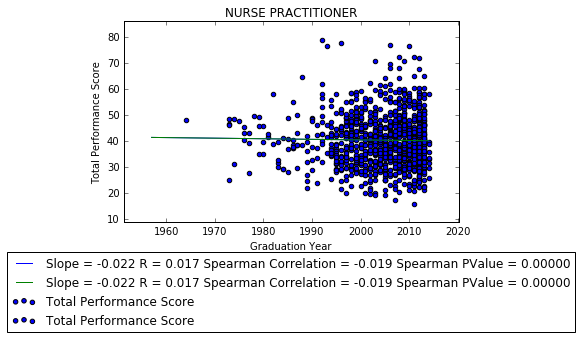

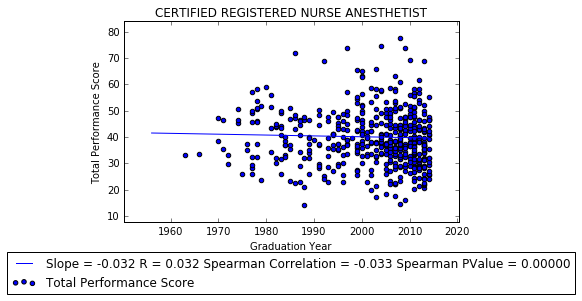

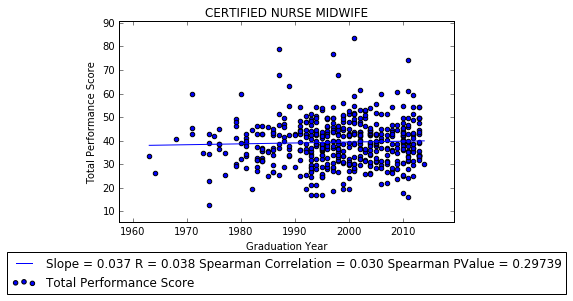

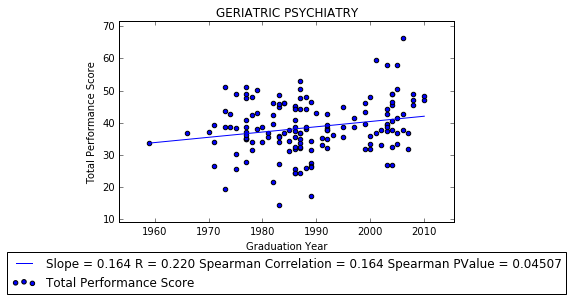

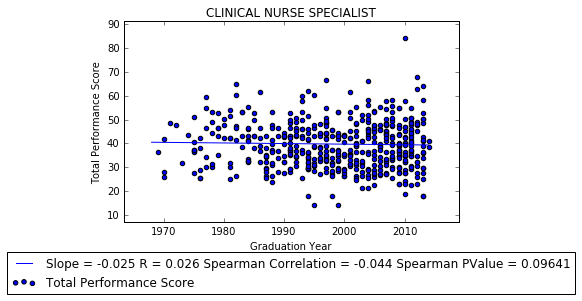

In [5]:
# f = open('2016-08-25_results.csv', 'w')

# print('Specialty', 'Spearman Value', 'Spearman PValue', 'R', 'R^2', 'Slope', 'Mean', 'Standard Deviation', sep=',', file=f)
# f.flush()

for specialty, ind in data.groupby('Primary specialty').groups.items():
    year = data.ix[ind, 'Graduation year']
    years = np.array(year)[:, np.newaxis]
    scores = data.ix[ind, 'Total Performance Score']
    lr = linear_model.LinearRegression()
    lr.fit(years, scores)
    m = lr.coef_[0]
    r2 = lr.score(years, scores)
    r = r2**(1/2)
    s = spearmanr(year, scores)
    
    g = data.ix[ind, :].groupby('Graduation year')
    std_score = g['Total Performance Score'].std()
    mean_score = g['Total Performance Score'].mean()

#     print(specialty,
#           '%0.3f' % (s.correlation),
#           '%0.5f' % (s.pvalue),
#           '%0.3f' % (r),
#           '%0.3f' % (r2),
#           '%0.3f' % (m),
#           '%0.3f' % (scores.mean()),
#           '%0.3f' % (scores.std()),
#           sep=',',
#           file=f)
#     f.flush()

    if (s.correlation > 0.4 and s.pvalue < .05) or \
        specialty in [
          'GERIATRIC PSYCHIATRY',
          'NURSE PRACTITIONER',
          'CERTIFIED NURSE MIDWIFE',
          'CERTIFIED REGISTERED NURSE ANESTHETIST',
          'CLINICAL NURSE SPECIALIST']:
        samp = data.ix[ind].sample(min(500, len(ind)))
        draw(kind='plot',
             x=[min(year), max(year)],
             y=lr.predict([[min(year)], [max(year)]]),
             label='Slope = %0.3f R = %0.3f Spearman Correlation = %0.3f Spearman PValue = %0.5f' % (m, r, s.correlation, s.pvalue))
        draw(kind='scatter',
             x=samp['Graduation year'],
             y=samp['Total Performance Score'],
             label='Actual Points')
#         draw(kind='errorbar',
#              fmt='o',
#              x=list(g.groups.keys()),
#              y=mean_score,
#              yerr=std_score,
#              label='Mean scores for this year')
        draw(xlabel='Graduation Year',
             ylabel='Total Performance Score',
             title=specialty,
             legend='bottom',
             show=True)

# f.close()

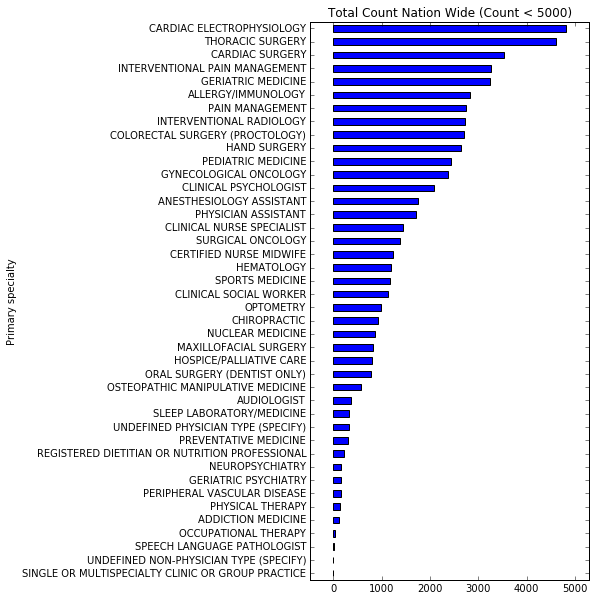

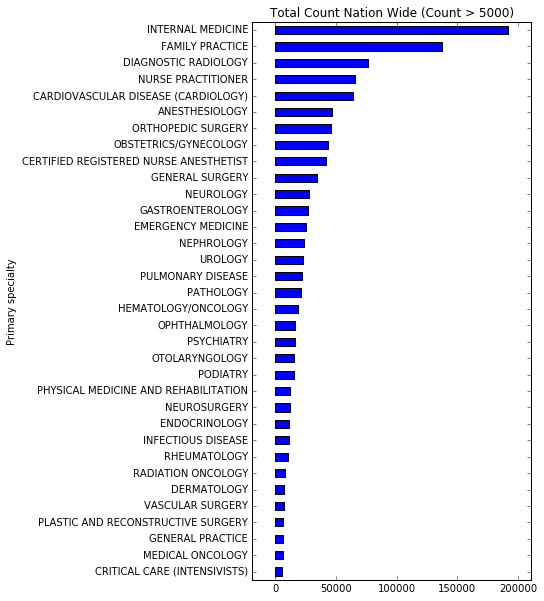

42 34


In [6]:
c = data.groupby('Primary specialty').count()['Graduation year']
plt.figure(figsize=(5, 10))
plt.clf()
plt.title('Total Count Nation Wide (Count < 5000)')
c[c<5000].sort_values(ascending=True).plot.barh()
draw(save='total_count<5000.png', show=True)
plt.figure(figsize=(5, 10))
plt.clf()
plt.title('Total Count Nation Wide (Count > 5000)')
c[c>5000].sort_values(ascending=True).plot.barh()
draw(save='total_count>5000.png', show=True)
print(len(c[c<5000]), len(c[c>5000]))

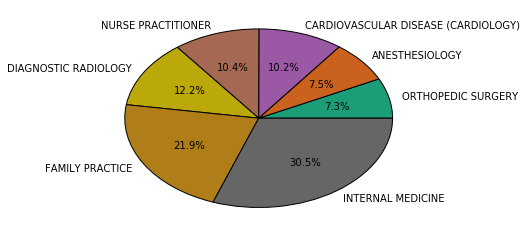

In [94]:
plt.clf()
d = data.groupby('Primary specialty').count()['Graduation year'].sort_values()
ax = d[(d - d.mean()) / d.std() > 1].plot.pie(autopct='%1.1f%%', colormap='Dark2')
ax.set_ylabel('')
ax.set_title('')
plt.show()

In [1]:
np.random.seed(2016)
cmap = matplotlib.colors.ListedColormap(np.random.rand(256, 3))
plt.clf()
i = iter(reversed(range(len(d.index))))
def func(pct):
    global i
    if next(i) <= 6:
        return '%1.1f%%' % (pct)
    else:
        return ''
ax = d.plot(kind='pie', colormap=cmap,
            autopct=func,
            labels=[l if i > len(d.index)-11 else '' for i, l in enumerate(d.index)])
ax.set_ylabel('')
draw(show=True, save='specialty_pie_chart.png', dpi=300)

NameError: name 'np' is not defined

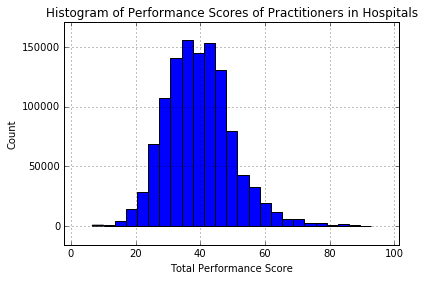

In [130]:
data['Total Performance Score'].hist(bins=25)
draw(show=True, save='hist_performance_scores_practitioners.png', dpi=300, xlabel='Total Performance Score', ylabel='Count', title='Histogram of Performance Scores of Practitioners in Hospitals')

In [128]:
hospital_scores = pd.read_sql('''
select
  `Total Performance Score`
from hospitals;
''', sql)

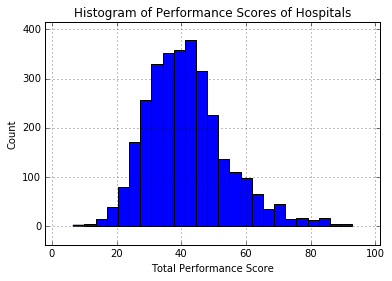

In [131]:
hospital_scores['Total Performance Score'].hist(bins=25)
draw(show=True, save='hist_performance_scores_hospitals.png', dpi=300, xlabel='Total Performance Score', ylabel='Count', title='Histogram of Performance Scores of Hospitals')

In [134]:
d=data['Provider Number'].value_counts()

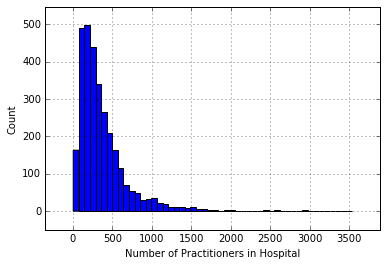

In [141]:
plt.clf(); d.hist(bins=50); draw(show=True, xlabel='Number of Practitioners in Hospital', ylabel='Count', save='hist_hospital_practitioner_count.png', dpi=300)

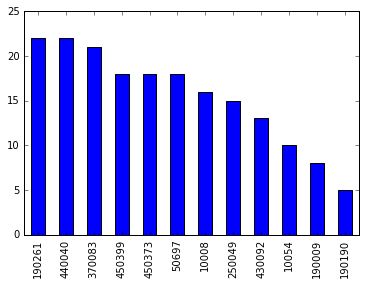

In [21]:
plt.clf(); d[d<25].plot.bar(); plt.show()

In [35]:
d[d<500][10001]

450

In [38]:
df = data[data['Provider Number'].isin(d[d<500].index)]

In [50]:
f = open('2016-08-31_results.csv', 'w')
print('Specialty', 'Spearman Value', 'Spearman PValue', 'R', 'R^2', 'Slope', 'Mean', 'Standard Deviation', sep=',', file=f)
f.flush()

for specialty, ind in df.groupby('Primary specialty').groups.items():
    year = df.ix[ind, 'Graduation year']
    years = np.array(year)[:, np.newaxis]
    scores = df.ix[ind, 'Total Performance Score']
    lr = linear_model.LinearRegression()
    lr.fit(years, scores)
    m = lr.coef_[0]
    r2 = lr.score(years, scores)
    r = r2**(1/2)
    s = spearmanr(year, scores)
    
    g = df.ix[ind, :].groupby('Graduation year')
    std_score = g['Total Performance Score'].std()
    mean_score = g['Total Performance Score'].mean()

    print(specialty,
          '%0.3f' % (s.correlation),
          '%0.5f' % (s.pvalue),
          '%0.3f' % (r),
          '%0.3f' % (r2),
          '%0.3f' % (m),
          '%0.3f' % (scores.mean()),
          '%0.3f' % (scores.std()),
          sep=',',
          file=f)
    f.flush()

f.close()

In [47]:
d = pd.read_csv('2016-08-31_results.csv')

In [48]:
d.sort_values('Spearman Value', ascending=False)

,Specialty,Spearman Value,Spearman PValue,R,R^2,Slope,Mean,Standard Deviation
8,SPEECH LANGUAGE PATHOLOGIST,0.714,0.11079,0.681,0.463,0.636,37.751,9.578
5,GERIATRIC PSYCHIATRY,0.390,0.00609,0.458,0.210,0.383,39.388,10.033
62,NEUROPSYCHIATRY,0.211,0.06987,0.192,0.037,0.175,40.771,10.966
47,SLEEP LABORATORY/MEDICINE,0.114,0.19154,0.139,0.019,0.142,45.490,11.481
4,ADDICTION MEDICINE,0.111,0.47823,0.050,0.003,0.051,39.277,12.267
32,HEMATOLOGY,0.104,0.03829,0.083,0.007,0.089,40.210,11.520
0,DERMATOLOGY,0.088,0.00002,0.104,0.011,0.092,41.005,11.081
6,ANESTHESIOLOGY ASSISTANT,0.081,0.04744,0.071,0.005,0.086,38.603,11.303
39,COLORECTAL SURGERY (PROCTOLOGY),0.079,0.01850,0.074,0.006,0.078,40.135,11.558
41,CLINICAL PSYCHOLOGIST,0.075,0.05431,0.065,0.004,0.065,41.248,11.018
